# Analiza saobracaja Srbije - Projekat iz predmeta SIAP i NM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('train_belgrade.csv')


Kolone koje su dobijene iz podataka su
- Timestamp: Trenutak u kom je slika preuzeta
- Detections: Broj detektovanih vozila
- Temperature: Temperatura vazduha izrazena u C
- WeatherMain: Podatak o vremenskim uslovima
- WeatherDescription: Detaljniji opis vremenskih uslova

In [ ]:
print(df.head())


   Unnamed: 0                   Timestamp  Detections  index WeatherMain  \
0           0  2023-12-02T10:40:00.000000          19   4119        Snow   
1           1  2023-12-02T10:40:00.000000          21   4119        Snow   
2           2  2023-12-02T10:45:00.000000          12   2779        Snow   
3           3  2023-12-02T10:50:00.000000          19   4920        Snow   
4           4  2023-12-02T10:55:00.000000          14  12934        Snow   

   Temperature WeatherDescription  
0         0.28               snow  
1         0.28               snow  
2         0.28               snow  
3         0.28               snow  
4         0.28               snow  


In [36]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14637 entries, 0 to 14636
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          14637 non-null  int64  
 1   Timestamp           14637 non-null  object 
 2   Detections          14637 non-null  int64  
 3   index               14637 non-null  int64  
 4   WeatherMain         14637 non-null  object 
 5   Temperature         14637 non-null  float64
 6   WeatherDescription  14637 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 800.6+ KB
None
        Unnamed: 0    Detections         index   Temperature
count  14637.00000  14637.000000  14637.000000  14637.000000
mean    7318.00000     11.582701   6472.349593      3.416630
std     4225.48228      6.786596   3739.960137      4.463299
min        0.00000      0.000000      0.000000     -4.760000
25%     3659.00000      6.000000   3232.000000      0.200000
50%     7318.000

Najbitnije informacije o podacima
- Srednja vrednost za broj detekcija je ~12, dok je standardna devijacija ~7
- Srednja vrednost temperature je ~3, dok je standardna devijacija ~4

In [7]:
df['WeatherMain'].value_counts()

WeatherMain
Clouds    8833
Snow      2501
Clear     2427
Rain       876
Name: count, dtype: int64

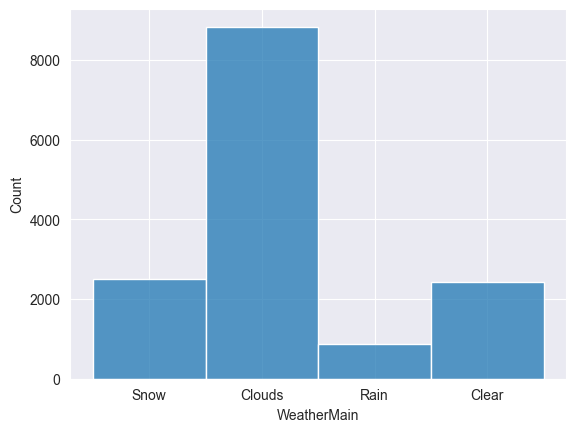

In [37]:
plt.figure()
sns.histplot(df['WeatherMain'])
plt.show()

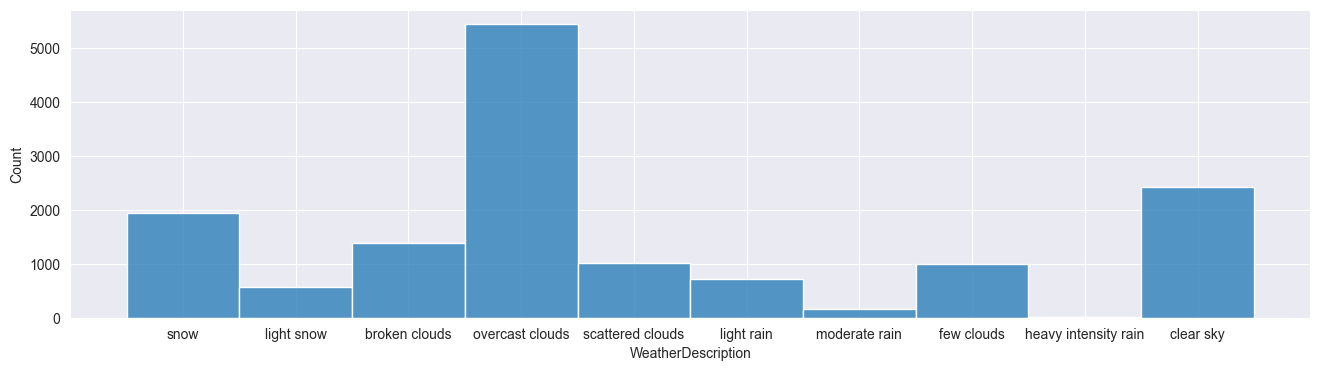

In [38]:
plt.figure(figsize=(16, 4))
sns.histplot(df['WeatherDescription'])
plt.show()

Radi simplifikacije, analiziracemo WeatherMain umesto WeatherDescription, jer vozacima generalno nije bitan ovoliki nivo detalja pri odluci da li ce upravljati motornim vozilom

In [39]:
print(df.isnull().sum())


Unnamed: 0            0
Timestamp             0
Detections            0
index                 0
WeatherMain           0
Temperature           0
WeatherDescription    0
dtype: int64


In [40]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = df['Timestamp'].dt.normalize()
df['Time'] = df['Timestamp'].dt.time
df['Hour'] = df['Timestamp'].dt.hour


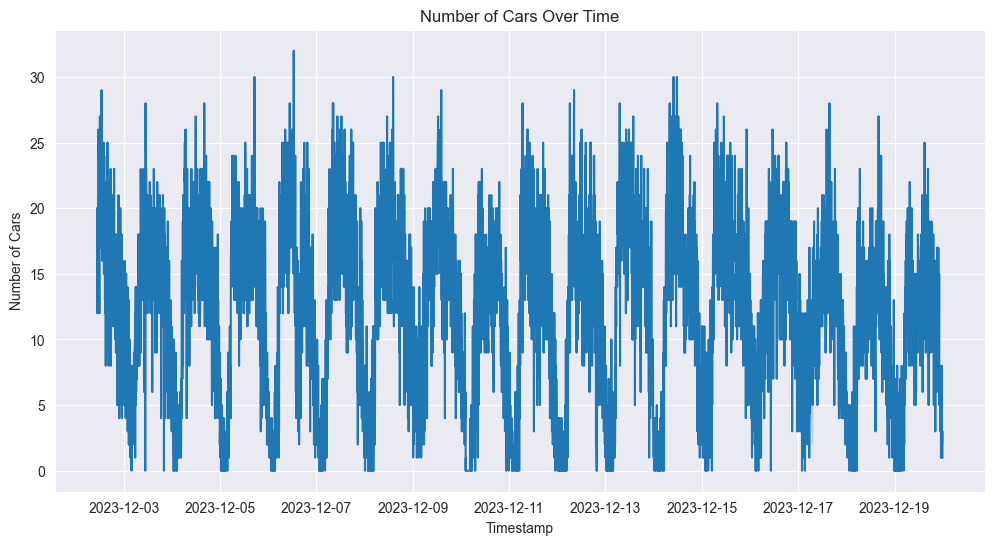

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Detections', data=df[df['Date'] < pd.to_datetime('2023-12-20T00:00:00')])
plt.title('Number of Cars Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Cars')
plt.show()


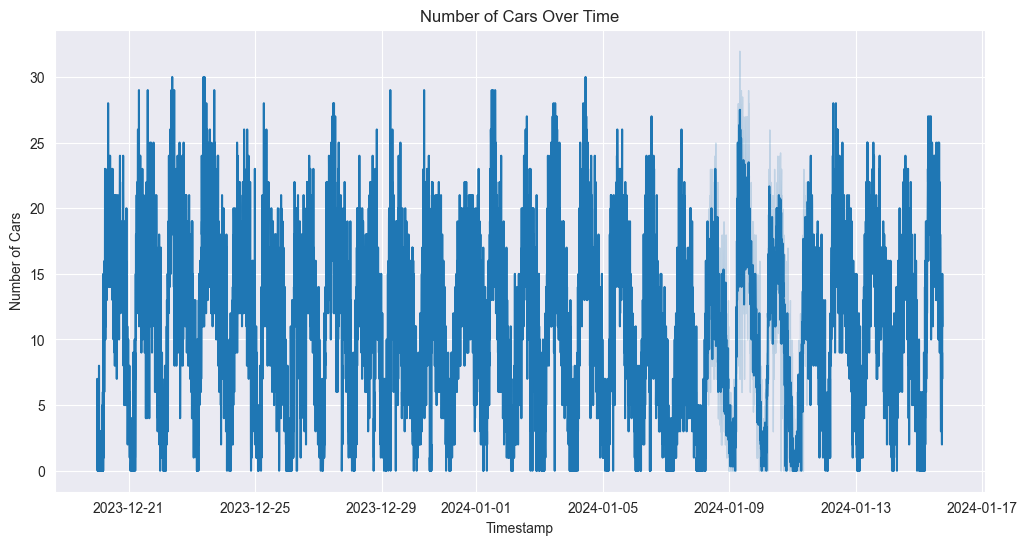

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Detections', data=df[df['Date'] >= pd.to_datetime('2023-12-20T00:00:00')])
plt.title('Number of Cars Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Number of Cars')
plt.show()


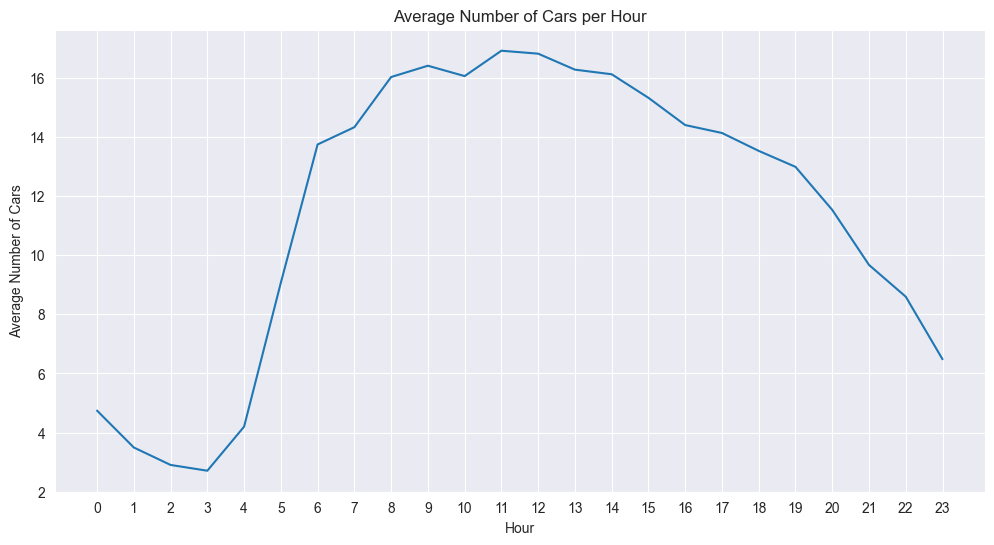

In [43]:
hourly_avg = df.groupby('Hour')['Detections'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Number of Cars per Hour')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.xticks(range(0, 24))
plt.show()


In [44]:
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour

<Axes: xlabel='Hour', ylabel='Detections'>

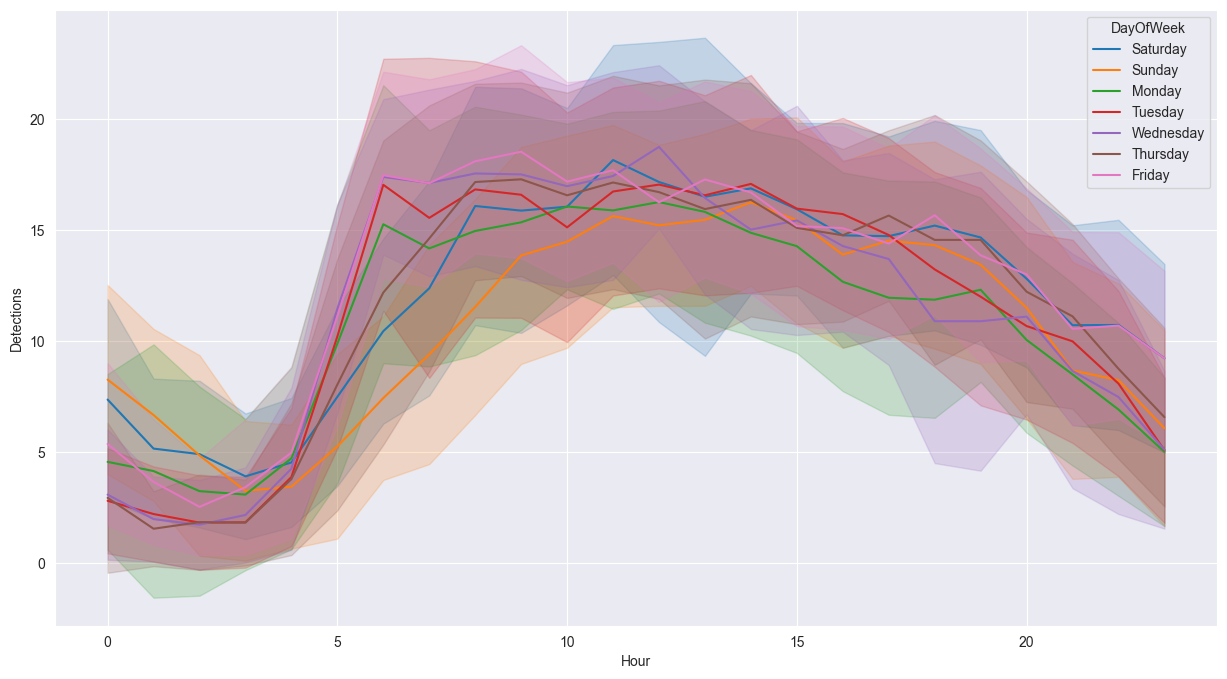

In [45]:
plt.figure(figsize=(15, 8))

sns.lineplot(data=df, x='Hour', y='Detections', hue='DayOfWeek', estimator='mean', errorbar='sd')


Sa grafika gore vidimo da podaci prate odredjen sablon, koji je smislen. Generalno je intenzitet saobracaja daleko manji tokom noci, dok se peak desava ujutru, kada ljudi idu na posao.

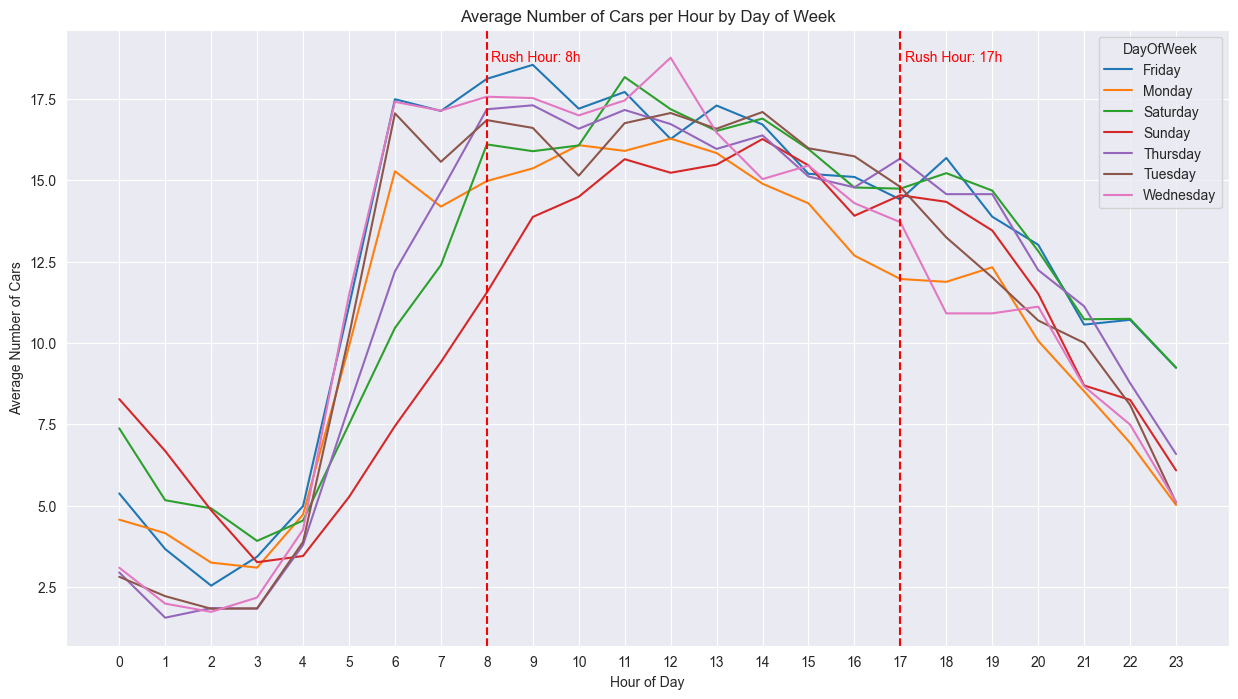

In [46]:
plt.figure(figsize=(15, 8))
hourly_avg = df.groupby(['DayOfWeek', 'Hour'])['Detections'].mean().reset_index()
sns.lineplot(data=hourly_avg, x='Hour', y='Detections', hue='DayOfWeek')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.title('Average Number of Cars per Hour by Day of Week')
plt.ylabel('Average Number of Cars')
plt.xlabel('Hour of Day')
plt.xticks(range(24))

for hour in [8, 17]:
    plt.axvline(hour, color='red', linestyle='--')
    plt.text(hour+.1, plt.ylim()[1]*0.95, f'Rush Hour: {hour}h', color='red')

plt.show()

Primecujemo da je saobracaj najmanjeg intenziteta nedeljom ujutru, sto je svakako ocekivano, uzevsi u obzir da je vecini ljudi to slobodan dan.

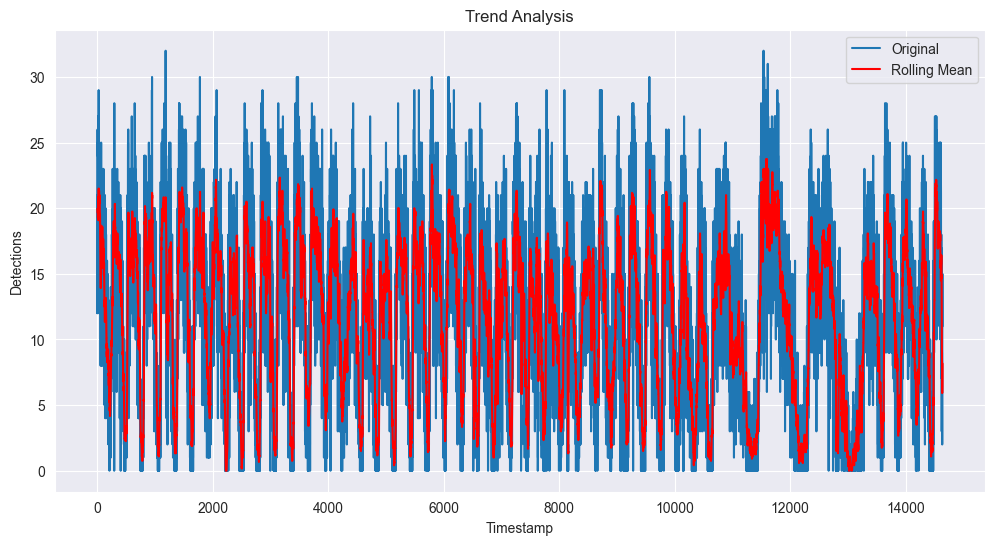

In [61]:
df['Rolling_Mean'] = df['Detections'].rolling(window=12).mean()
# TODO: X osa
plt.figure(figsize=(12,6))
plt.plot(df['Detections'], label='Original')
plt.plot(df['Rolling_Mean'], color='red', label='Rolling Mean')
plt.title('Trend Analysis')
plt.xlabel('Timestamp')
plt.ylabel('Detections')
plt.legend()
plt.show()


Kada radimo rolling mean, primecujemo da na predikciju dosta utice prethodnih 12 merenja, takodje znamo da su merenja vrsena na svakih 5 minuta, dakle prethonih sat vremena dosta utice na broj vozila.

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

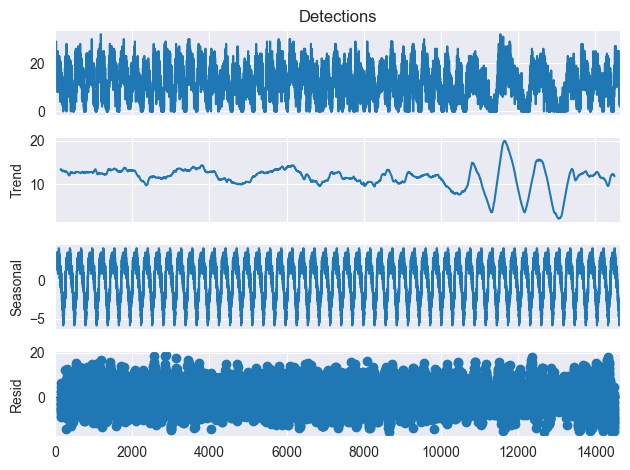

In [63]:
decomposition = seasonal_decompose(df['Detections'], model='additive', period=288)
decomposition.plot()
plt.show()


Primecujemo da su podaci sezonskog karaktera, pojavljuje se pravilan sablon u podacima. Potrebno je jos istraziti o rezidualima. Moguce da postoje outliers.

<Figure size 1200x600 with 0 Axes>

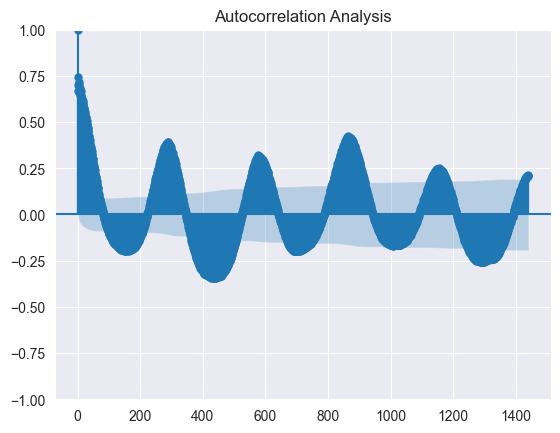

In [67]:
plt.figure(figsize=(12,6))
plot_acf(df['Detections'], lags=288*5)
plt.title('Autocorrelation Analysis')
plt.show()

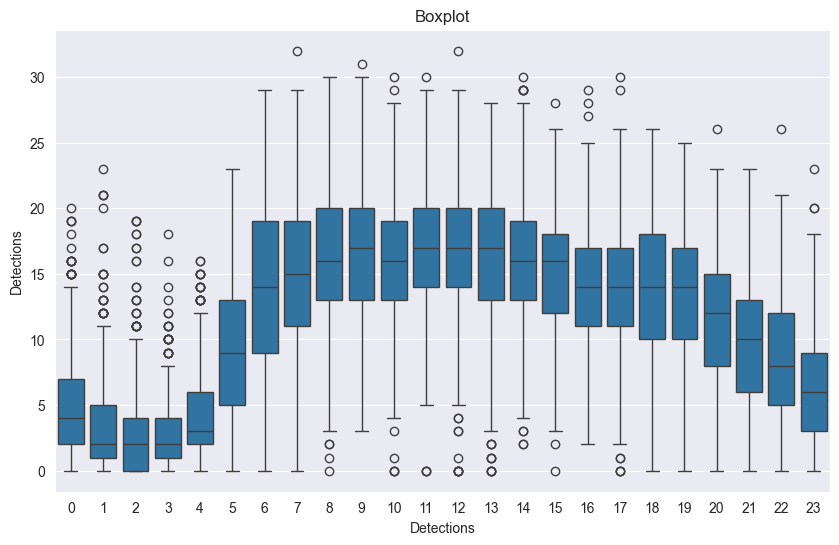

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Hour', y='Detections')
plt.title('Boxplot')
plt.xlabel('Detections')
plt.show()


In [83]:
Q1 = df.groupby('Hour')['Detections'].quantile(0.25)
Q3 = df.groupby('Hour')['Detections'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

def is_outlier(row):
    lb = lower_bound[row['Hour']]
    ub = upper_bound[row['Hour']]
    return row['Detections'] < lb or row['Detections'] > ub

outliers_df = df[df.apply(is_outlier, axis=1)]

In [87]:
outliers_df.count()

Unnamed: 0            173
Timestamp             173
Detections            173
index                 173
WeatherMain           173
Temperature           173
WeatherDescription    173
Date                  173
Time                  173
Hour                  173
DayOfWeek             173
Rolling_Mean          173
Rolling_Std           173
Z_Score               173
dtype: int64

In [86]:
outliers_df['Date'].unique()

<DatetimeArray>
['2023-12-03 00:00:00', '2023-12-04 00:00:00', '2023-12-05 00:00:00',
 '2023-12-06 00:00:00', '2023-12-07 00:00:00', '2023-12-08 00:00:00',
 '2023-12-09 00:00:00', '2023-12-10 00:00:00', '2023-12-11 00:00:00',
 '2023-12-14 00:00:00', '2023-12-15 00:00:00', '2023-12-16 00:00:00',
 '2023-12-17 00:00:00', '2023-12-18 00:00:00', '2023-12-20 00:00:00',
 '2023-12-21 00:00:00', '2023-12-22 00:00:00', '2023-12-23 00:00:00',
 '2023-12-24 00:00:00', '2023-12-25 00:00:00', '2023-12-26 00:00:00',
 '2023-12-27 00:00:00', '2023-12-28 00:00:00', '2023-12-29 00:00:00',
 '2023-12-30 00:00:00', '2023-12-31 00:00:00', '2024-01-01 00:00:00',
 '2024-01-02 00:00:00', '2024-01-03 00:00:00', '2024-01-04 00:00:00',
 '2024-01-06 00:00:00', '2024-01-07 00:00:00', '2024-01-08 00:00:00',
 '2024-01-09 00:00:00', '2024-01-10 00:00:00', '2024-01-12 00:00:00',
 '2024-01-13 00:00:00', '2024-01-14 00:00:00', '2024-01-15 00:00:00']
Length: 39, dtype: datetime64[ns]

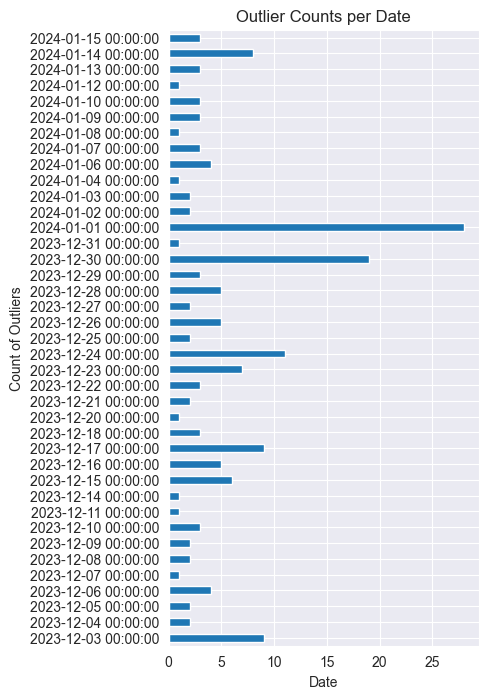

In [102]:
outlier_counts_per_date = outliers_df.groupby('Date')['Detections'].count()
plt.figure(figsize=(4,8))
outlier_counts_per_date.plot(kind='barh')
plt.title('Outlier Counts per Date')
plt.xlabel('Date')
plt.ylabel('Count of Outliers')
# plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Timestamp', ylabel='Temperature'>

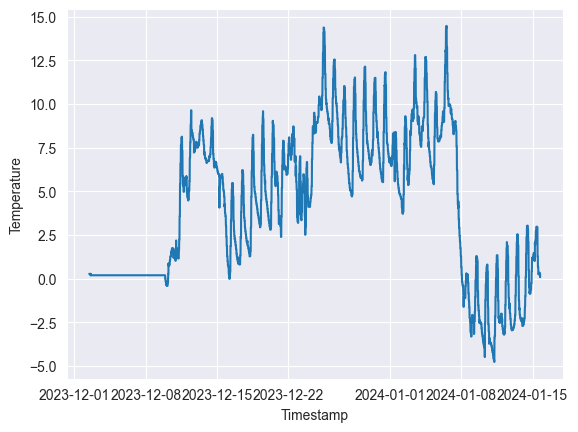

In [103]:
sns.lineplot(df, y='Temperature', x='Timestamp')
plt.show()

#TODO: Ovde deluje da je bio problem u periodu do 9.12.2023. i potrebno je ispraviti ih

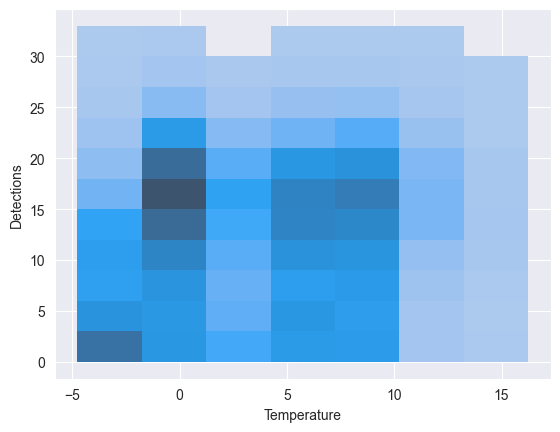

In [106]:
sns.histplot(df, y='Detections', x='Temperature', binwidth=3)
plt.show()

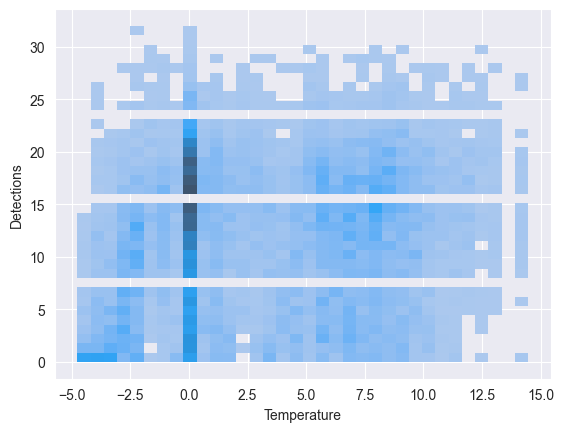

In [107]:
sns.histplot(df, y='Detections', x='Temperature')
plt.show()

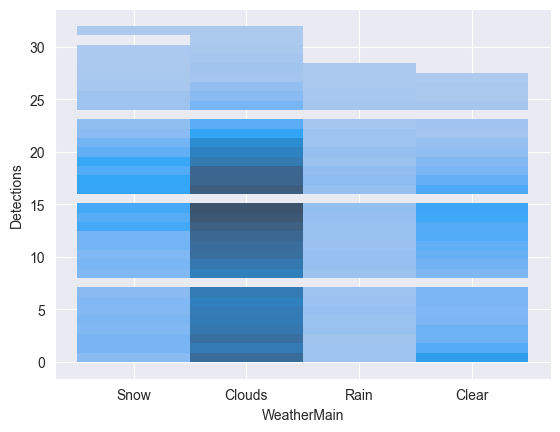

In [110]:
sns.histplot(df, y='Detections', x='WeatherMain')
plt.show()

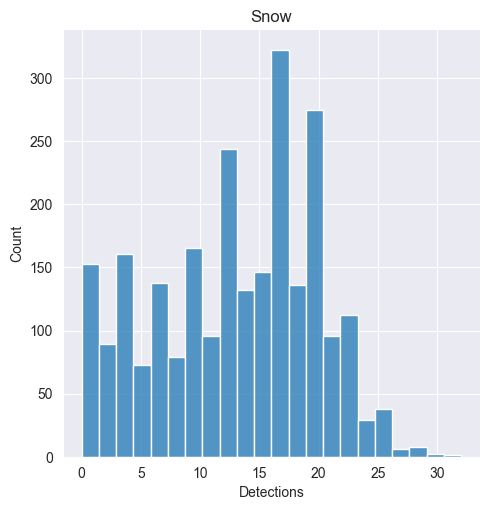

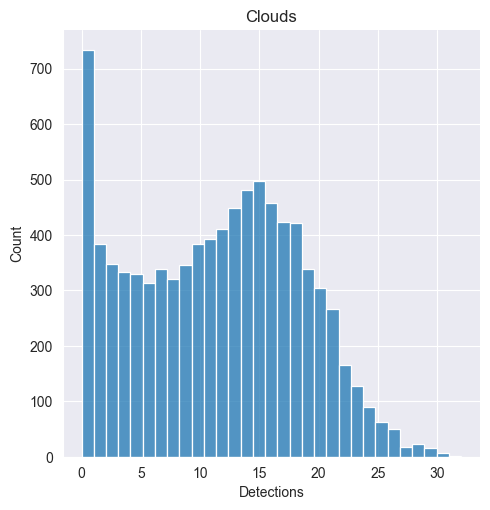

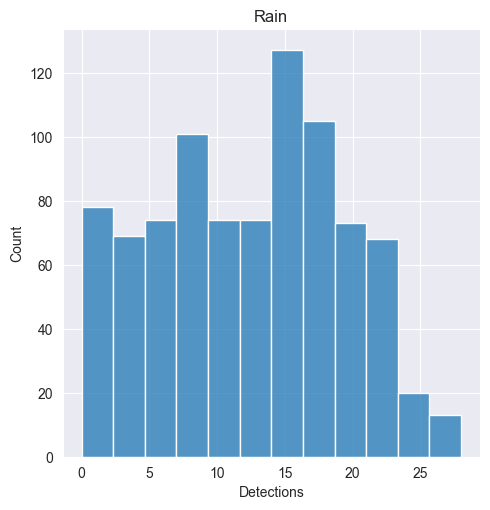

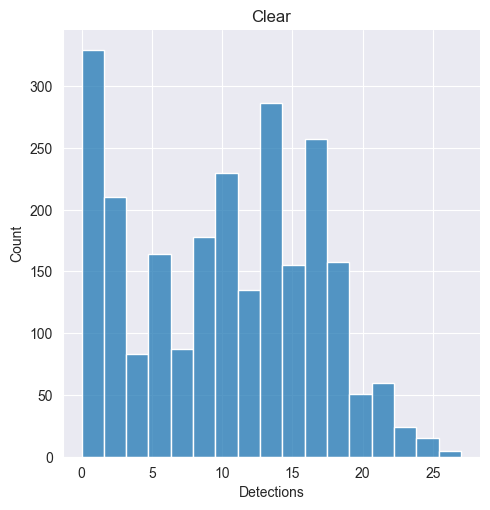

In [122]:
for wt in list(df['WeatherMain'].unique()):
    df_snow = df[df['WeatherMain'] == wt]
    sns.displot(df_snow['Detections'])
    plt.title(wt)
    plt.show()

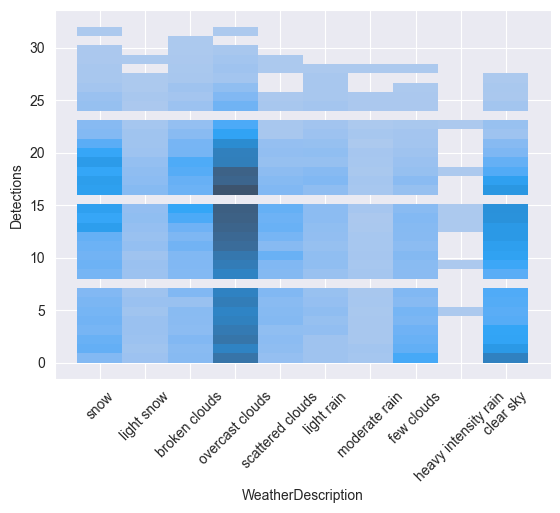

In [123]:
sns.histplot(df, y='Detections', x='WeatherDescription')
plt.xticks(rotation=45)
plt.show()

In [135]:
df_sub = df[['Detections', 'Hour', 'Temperature', 'WeatherMain']].copy()

In [136]:
df_sub.loc[:, 'WeatherMain'] = df_sub['WeatherMain'].map({
    'Snow': 0,
    'Rain': 1,
    'Clouds': 2,
    'Clear': 3,
})


In [137]:
df_sub['Lag_Detections'] = df_sub['Detections'].shift(12)

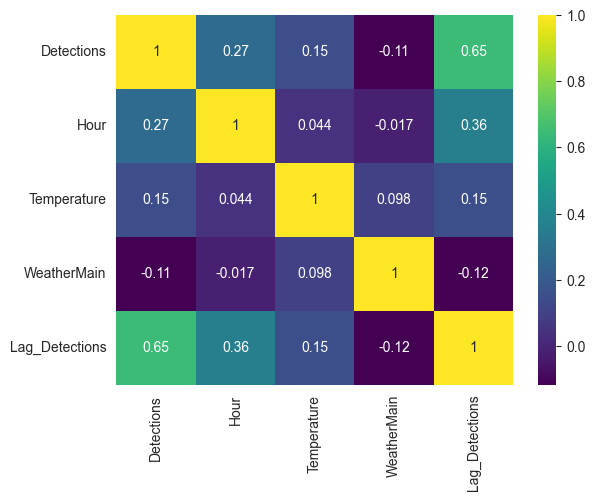

In [141]:
corr_matrix = df_sub.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()